In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
import pandas as pd

In [4]:
# create engine to hawaii.sqlite
hawaii_database_path ="Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{hawaii_database_path}")
conn = engine.connect()

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# For measurement table
# Get a list of column names and types 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# For station table
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [10]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [11]:
# Assign the classes to two variables called `Measurement` and 'Station' 
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create a session
session = Session(engine)

In [13]:
#For measurement class
# Display the row's columns and data in dictionary format 
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2acfe018c10>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [14]:
# Query All Records in the the measurement Table
df_measurement = pd.read_sql("SELECT * FROM measurement", conn)
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [15]:
#For Station class
# Display the row's columns and data in dictionary format
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2acfa83c730>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [16]:
# Query All Records in the the Station Table
df_station = pd.read_sql("SELECT * FROM station", conn)
df_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results. 
# Starting from the most recent data point in the database. 

In [18]:
# Measurement table
# Total dates
session.query(func.count(measurement.date)).all()

[(19550,)]

In [19]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [20]:
# Query for the measurement date 12 months before `2017-08-23` 
# using the datetime library
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [21]:
# Query for the date and precipitation (open, high, low, close) 
# from the last 12 months (2016-8-23 to 2017-8-23)
# Sort the result by date

date_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23',measurement.prcp >= 0).all()
date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

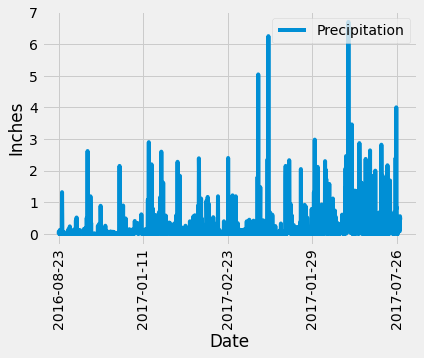

<Figure size 1440x1440 with 0 Axes>

In [22]:
# Plot the Results in a Matplotlib bar chart
df_date = pd.DataFrame(date_prcp, columns=['date', 'Precipitation'])
df_date.set_index('date', inplace=False)
df_date.plot(x="date", y="Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_measurement['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
# Measurement table
# Total dates
session.query(func.count(station.station)).all()

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(station.station).order_by(func.count(station.station).desc()).group_by(station.station).all()

[('USC00519523',),
 ('USC00519397',),
 ('USC00519281',),
 ('USC00518838',),
 ('USC00517948',),
 ('USC00516128',),
 ('USC00514830',),
 ('USC00513117',),
 ('USC00511918',)]

In [26]:
df_measurement.columns

Index(['id', 'station', 'date', 'prcp', 'tobs'], dtype='object')

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# List all of the measurment records for the most active station id
stn1 = session.query(measurement.station,measurement.tobs,measurement.date).\
    filter(station.station == 'USC00519523').all()
stn1

C:\Users\yings\AppData\Local\Temp/ipykernel_78924/1115639151.py:4: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  stn1 = session.query(measurement.station,measurement.tobs,measurement.date).\


[('USC00519397', 65.0, '2010-01-01'),
 ('USC00519397', 63.0, '2010-01-02'),
 ('USC00519397', 74.0, '2010-01-03'),
 ('USC00519397', 76.0, '2010-01-04'),
 ('USC00519397', 73.0, '2010-01-06'),
 ('USC00519397', 70.0, '2010-01-07'),
 ('USC00519397', 64.0, '2010-01-08'),
 ('USC00519397', 68.0, '2010-01-09'),
 ('USC00519397', 73.0, '2010-01-10'),
 ('USC00519397', 64.0, '2010-01-11'),
 ('USC00519397', 61.0, '2010-01-12'),
 ('USC00519397', 66.0, '2010-01-14'),
 ('USC00519397', 65.0, '2010-01-15'),
 ('USC00519397', 68.0, '2010-01-16'),
 ('USC00519397', 64.0, '2010-01-17'),
 ('USC00519397', 72.0, '2010-01-18'),
 ('USC00519397', 66.0, '2010-01-19'),
 ('USC00519397', 66.0, '2010-01-20'),
 ('USC00519397', 69.0, '2010-01-21'),
 ('USC00519397', 67.0, '2010-01-22'),
 ('USC00519397', 67.0, '2010-01-23'),
 ('USC00519397', 71.0, '2010-01-24'),
 ('USC00519397', 67.0, '2010-01-25'),
 ('USC00519397', 76.0, '2010-01-26'),
 ('USC00519397', 68.0, '2010-01-27'),
 ('USC00519397', 72.0, '2010-01-28'),
 ('USC005193

In [28]:
# Create a new DataFrame that for the most active station
df_stn1 = df_measurement.loc[df_measurement["station"] == "USC00519523"]
df_stn1

,id,station,date,prcp,tobs
9518,9519,USC00519523,2010-01-01,0.15,75.0
9519,9520,USC00519523,2010-01-02,0.00,75.0
9520,9521,USC00519523,2010-01-03,0.00,77.0
9521,9522,USC00519523,2010-01-04,0.00,75.0
9522,9523,USC00519523,2010-01-05,0.01,75.0
...,...,...,...,...,...
12182,12183,USC00519523,2017-08-17,0.05,83.0
12183,12184,USC00519523,2017-08-19,NaN,85.0
12184,12185,USC00519523,2017-08-21,NaN,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max = df_stn1['tobs'].max()
min = df_stn1['tobs'].min()
avg = df_stn1['tobs'].mean()

print(f"The lowest temperature of the most active station id (USC00519523) is {min}.")
print(f"The highest temperature of the most active station id (USC00519523) is {max}.")
print(f"The average temperature of the most active station id (USC00519523) is {round(avg,2)}.")

The lowest temperature of the most active station id (USC00519523) is 56.0.
The highest temperature of the most active station id (USC00519523) is 85.0.
The average temperature of the most active station id (USC00519523) is 74.54.


In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import matplotlib.pyplot as plt
import scipy.stats as st

In [31]:
#Find out the latest date for the most active station
df_stn1 = df_stn1.sort_values(['date'], ascending=False)
df_stn1

,id,station,date,prcp,tobs
12186,12187,USC00519523,2017-08-23,0.08,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0
12184,12185,USC00519523,2017-08-21,NaN,82.0
12183,12184,USC00519523,2017-08-19,NaN,85.0
12182,12183,USC00519523,2017-08-17,0.05,83.0
...,...,...,...,...,...
9522,9523,USC00519523,2010-01-05,0.01,75.0
9521,9522,USC00519523,2010-01-04,0.00,75.0
9520,9521,USC00519523,2010-01-03,0.00,77.0
9519,9520,USC00519523,2010-01-02,0.00,75.0


In [32]:
#Filter to generate the dataframe for plotting 
df_stn1 = df_stn1.loc[(df_stn1['date']>='2016-08-23'),['date','tobs']]
df_stn1

,date,tobs
12186,2017-08-23,82.0
12185,2017-08-22,82.0
12184,2017-08-21,82.0
12183,2017-08-19,85.0
12182,2017-08-17,83.0
...,...,...
11854,2016-08-27,81.0
11853,2016-08-26,84.0
11852,2016-08-25,80.0
11851,2016-08-24,79.0


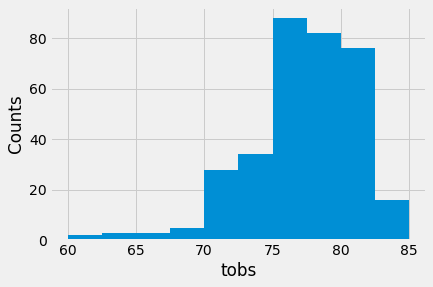

76.97032640949556
78.0
0    78.0
dtype: float64


In [33]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(df_stn1['tobs'])
plt.xlabel('tobs')
plt.ylabel('Counts')
plt.show()
print(df_stn1['tobs'].mean())
print(df_stn1['tobs'].median())
print(df_stn1['tobs'].mode())

# Close session

In [34]:
# Close Session
session.close()